Metric: Playing Fields

I chose this metric as having fields to play on is necessary for an athlete. If there is nowhere for the athlete to practice, then how can they train properly. Thus I figured this is an extremely important attribute a neighborhood should have if it is to be considered the best neighborhood in Pittsburgh.

Importing pandas and other necessary imports

In [14]:
import pandas as panda
import geopandas
%matplotlib inline
import matplotlib.pyplot as plot

In [22]:
dataFrame = panda.read_csv("PlayingFields.csv")
dataFrame.head(5)

,_id,id,name,has_lights,park,field_usage,goal_post,infield_type,left_field_distance,center_field_distance,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,1914615260,Arlington Field 1,t,Arlington Park,Diamond Only,0,Skinned,160.0,230.0,...,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.418314,-79.975007
1,2,1151740179,Armstrong,f,Armstrong Park,Diamond and Rectangular,0,Skinned,240.0,163.0,...,South Side Flats,3,17,42003170200,3,17,3,4-24,40.428074,-79.985662
2,3,971009139,Bandbox,f,Arsenal Park,Diamond Only,0,Skinned,135.0,200.0,...,Lower Lawrenceville,7,6,42003060300,2,6,2,3-3,40.466331,-79.961299
3,4,1581124728,Banksville,f,Banksville Park,Diamond Only,0,Skinned,304.0,354.0,...,Banksville,2,20,42003202300,5,20,6,4-9,40.413923,-80.039940
4,5,1052125703,Banksville School,t,Banksville School Park,Diamond Only,0,Skinned,180.0,175.0,...,Banksville,2,20,42003202300,5,20,6,4-9,40.407059,-80.037870


Here is the raw data from the playing fields dataset. The actual dataset contains 114 different parks, I've only printed the first 5 to show what information is in the table. 


Text(0, 0.5, '# of Fields')

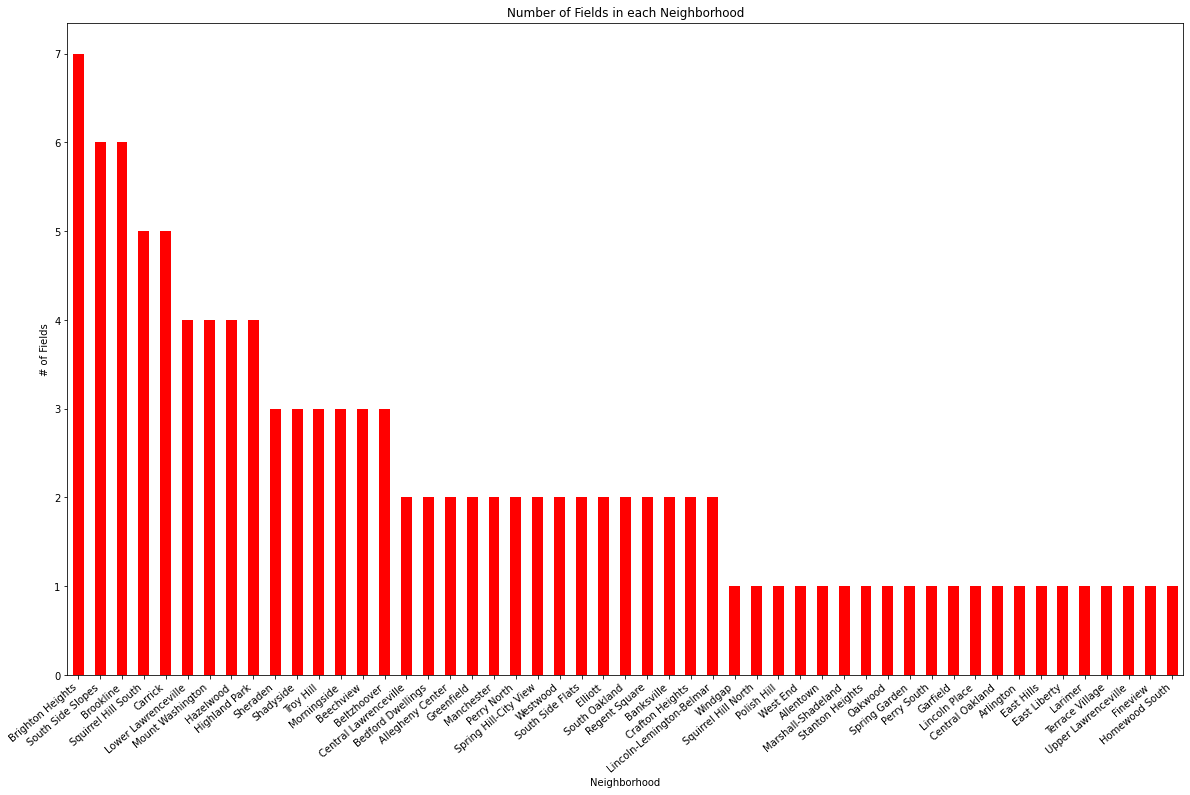

In [30]:
fieldsCount =dataFrame["neighborhood"].value_counts()
plot.figure(figsize=(20,12))
fieldsCount.plot(kind='bar', color =['red'])
plot.title("Number of Fields in each Neighborhood")
plot.xlabel("Neighborhood")
plot.xticks(rotation = 40, ha = "right")
plot.ylabel("# of Fields")

Here is a bar graph of each neighborhood, representing how many fields are located in each neighborhood.

Text(0, 0.5, '# of Fields')

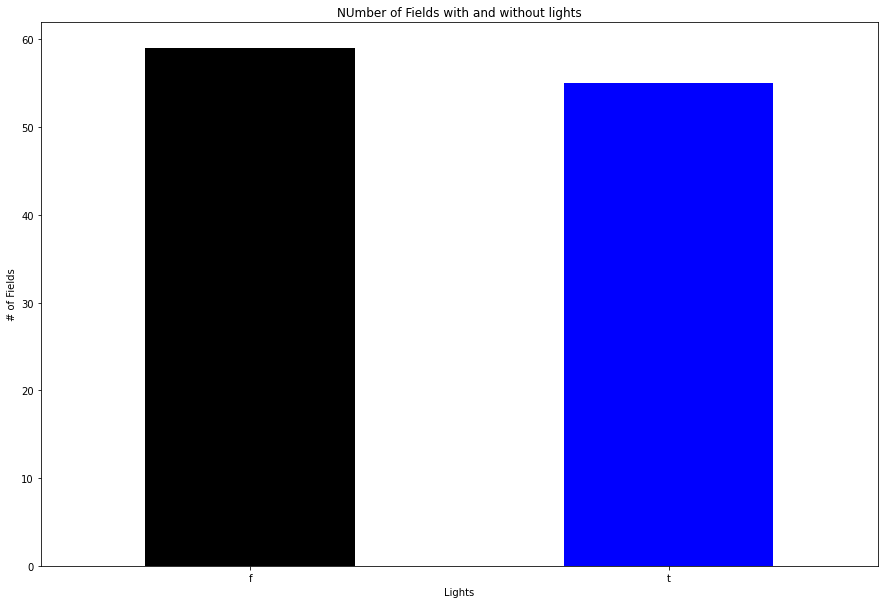

In [29]:
lightCounts = dataFrame['has_lights'].value_counts()
plot.figure(figsize=(15,10))
lightCounts.plot(kind='bar', color=['black', 'blue'])
plot.title("NUmber of Fields with and without lights")
plot.xlabel("Lights")
plot.xticks(rotation = 0)
plot.ylabel("# of Fields")

Here is a further distribution of the specific details of the fields, being whether or not the fields have lights or not. I figured this was an important data point to consider as having lights would be better for athletes, as they can more adequately play. 

In [26]:
fieldsCount = dataFrame["neighborhood"].value_counts().reset_index()
fieldsCount.columns = ['neighborhood', 'fields_count']
lightsCounts = dataFrame.groupby('neighborhood')['has_lights'].apply(lambda x: x.map({'t': 1, 'f': 0}).sum()).reset_index()
lightsCounts.columns = ['neighborhood', 'fields_with_lights']
mergedDF = panda.merge(fieldsCount, lightsCounts, on = 'neighborhood', how = 'left')
mergedDF['fields_with_lights'] = mergedDF['fields_with_lights'].fillna(0).astype(int)
mergedDF['sum_of_fields'] = mergedDF['fields_count'] + mergedDF['fields_with_lights']
mergedDF.drop(['fields_count', 'fields_with_lights'], axis=1, inplace=True)
sortedDF = mergedDF.sort_values(by= 'sum_of_fields', ascending = False)
mergedDF

,neighborhood,sum_of_fields
0,Brighton Heights,7
1,South Side Slopes,10
2,Brookline,9
3,Squirrel Hill South,7
4,Carrick,8
5,Lower Lawrenceville,6
6,Mount Washington,8
7,Hazelwood,5
8,Highland Park,4
9,Sheraden,4


Here is the merged data of our ranking system for all the neighborhoods in Pittsburgh

In [20]:
sortedDF.head(15)

,neighborhood,sum_of_fields
1,South Side Slopes,10
2,Brookline,9
4,Carrick,8
6,Mount Washington,8
0,Brighton Heights,7
3,Squirrel Hill South,7
12,Morningside,6
11,Troy Hill,6
5,Lower Lawrenceville,6
7,Hazelwood,5


Above is the sorted data, which ranks all the neighborhoods in order based upon how many baseball fields they have and the quality of them (lights or not). 

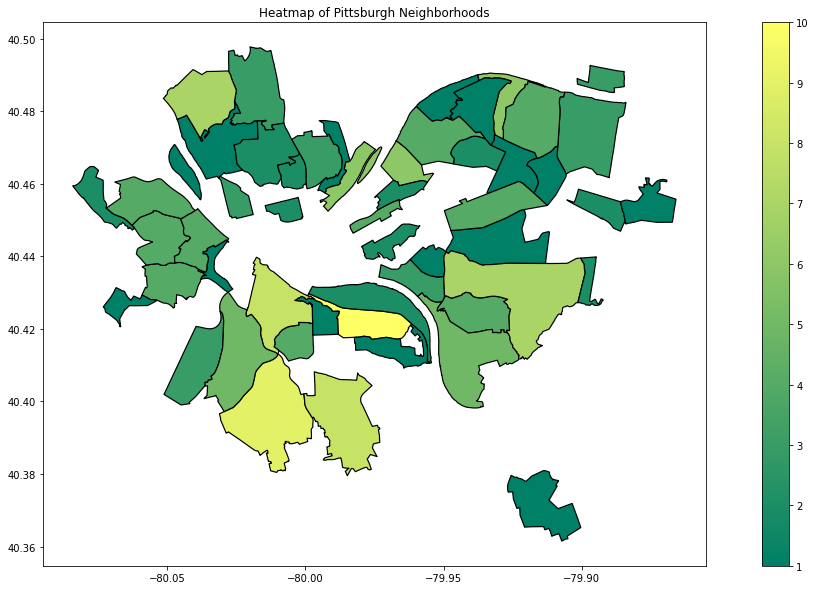

In [27]:
neighborhoods = geopandas.read_file("Neighborhoods_.shp")
geoDF = panda.merge(neighborhoods, sortedDF, left_on='hood', right_on='neighborhood', how='left')
fig, ax = plot.subplots(figsize=(20, 10))
geoDF.plot(column='sum_of_fields', cmap='summer', linewidth=1.2, ax=ax, edgecolor='black', legend=True)
plot.title('Heatmap of Pittsburgh Neighborhoods')
plot.show()

The heatmap represents how the ranking system of playing fields in each neighborhood in Pittsburgh. As the colors get more yellower, their quality and quantity increases. 

Conclusion: Thus I personally reached my conclusion from this dataset that South Side Slopes is the best neighborhood for athletes in Pittsburgh. It is just standalone in its point system at 10, above any others, that I had to choose it based upon this specific metric. 